In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import statsmodels.api as sm

In [2]:

tbc_data = pd.read_csv('GlobalLandTemperaturesByCity.csv', parse_dates = True)

tempbycity = pd.DataFrame(tbc_data)
time = pd.to_datetime(tempbycity['dt'])

tempbycity['year'] = time.dt.year
tempbycity['month']= time.dt.month
# Remove the NaN
clean_tempbycity = tempbycity.dropna()
# Select data for Santiago de Chile
santiago_data = clean_tempbycity[(clean_tempbycity.City == 'Santiago') & (clean_tempbycity.Country == 'Chile')]
# Compute the mean temperatures per year
grouped = santiago_data['AverageTemperature'].groupby(santiago_data['year'])
mean_temps = grouped.mean()

In [3]:

# Remove the first data point because it had incomplete measurments for the year, which might affect the average
# remember they are indexed now by the groupby parameter = year
mean_temps = mean_temps[mean_temps.index[1:]]


Populating the interactive namespace from numpy and matplotlib


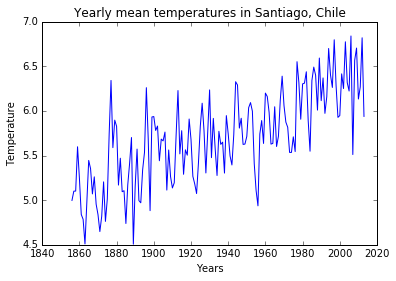

In [7]:
## Plotting
%pylab inline

plt.plot(mean_temps)
plt.title('Yearly mean temperatures in Santiago, Chile')
plt.xlabel('Years')
plt.ylabel('Temperature')

In [13]:
## Find the hottest year and the coldest

(hot_temp,hot_year) = (mean_temps.max(),mean_temps.argmax())
(cold_temp,cold_year) = (mean_temps.min(),mean_temps.argmin())
print(hot_temp, hot_year)
print(cold_temp,cold_year)

(6.838916666666667, 2006)
(4.5066666666666668, 1889)


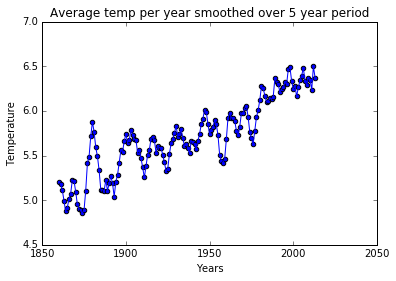

In [14]:
## Eliminate local (5 years) variation

smooth_temps = mean_temps.rolling(5).mean()
plt.plot(smooth_temps)
plt.scatter(smooth_temps.index, smooth_temps)
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.title('Average temp per year smoothed over 5 year period')

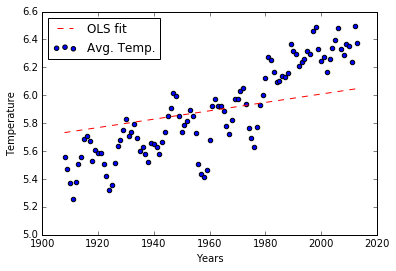

In [57]:
## Linear regression? 

smooth_temps = smooth_temps[smooth_temps.index[4:]] # removing the NaN

model = sm.OLS(smooth_temps,smooth_temps.index)
results = model.fit()

y = y = results.fittedvalues
plt.plot(smooth_temps.index, results.fittedvalues, 'r--',label="OLS fit")
plt.scatter(smooth_temps.index,smooth_temps,label='Avg. Temp.')
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.legend(loc='upper left')

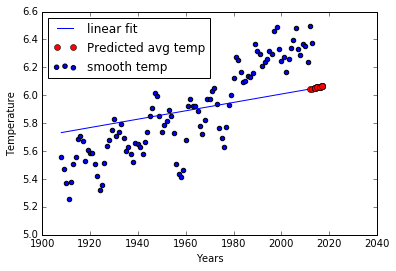

In [69]:
## Predictions of the fit
for i in range(2014,2018):
    y = y.append(pd.Series([results.params['x1']*i + 0.003], index=[i]))

plt.plot(y,label='linear fit')
plt.scatter(smooth_temps.index,smooth_temps,label='smooth temp')
plt.plot(y[y.index>= 2012],'ro',label='Predicted avg temp')
plt.legend(loc='upper left')
plt.xlabel('Years')
plt.ylabel('Temperature')